In [207]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
from folium.plugins import TimeSliderChoropleth
import folium
import seaborn as sns
import os
from branca.colormap import linear
from pandas.io.json import json_normalize
from LocalFunctions import get_hex_colors
%matplotlib inline

In [203]:
# df1 = pd.read_csv('raw_data1.csv')
# df2 = pd.read_csv('raw_data2.csv')
# df3 = pd.read_csv('raw_data3.csv')
df1 = pd.read_json('https://api.covid19india.org/raw_data1.json')
df2 = pd.read_json('https://api.covid19india.org/raw_data2.json')
df3 = pd.read_json('https://api.covid19india.org/raw_data3.json')

In [204]:
df = pd.DataFrame()

In [208]:
dfj1 = json_normalize(df1['raw_data'])
dfj2 = json_normalize(df2['raw_data'])
dfj3 = json_normalize(df3['raw_data'])

In [209]:
df = df.append(dfj1)
df = df.append(dfj2)
df = df.append(dfj3)

C:\Users\kisha\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [210]:
df.columns

Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'entryid', 'estimatedonsetdate', 'gender',
       'nationality', 'notes', 'numcases', 'patientnumber', 'source1',
       'source2', 'source3', 'statecode', 'statepatientnumber',
       'statuschangedate', 'typeoftransmission'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30669 entries, 0 to 2777
Data columns (total 22 columns):
agebracket                             30669 non-null object
backupnotes                            27891 non-null object
contractedfromwhichpatientsuspected    30669 non-null object
currentstatus                          30669 non-null object
dateannounced                          30669 non-null object
detectedcity                           30669 non-null object
detecteddistrict                       30669 non-null object
detectedstate                          30669 non-null object
entryid                                2778 non-null object
estimatedonsetdate                     27891 non-null object
gender                                 30669 non-null object
nationality                            30669 non-null object
notes                                  30669 non-null object
numcases                               2778 non-null object
patientnumber                          2

In [212]:
df['dateannounced'].unique()

array(['30/01/2020', '02/02/2020', '03/02/2020', '02/03/2020',
       '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020',
       '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020',
       '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020',
       '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020',
       '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020',
       '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020',
       '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020',
       '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020',
       '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020',
       '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020',
       '28/04/2020', '29/04/2020', '30/04/2020', '01/05

In [213]:
df['detectedstate'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', '', 'Tripura', 'Meghalaya'], dtype=object)

In [412]:
dfK= df[df['detectedstate']=='Karnataka']

In [413]:
dfK['detecteddistrict'].unique()

array(['Bengaluru Urban', 'Kalaburagi', 'Kodagu', 'Chikkaballapura',
       'Mysuru', 'Dharwad', 'Uttara Kannada', 'Dakshina Kannada', 'Udupi',
       'Davanagere', 'Bengaluru Rural', 'Tumakuru', 'Ballari', 'Bidar',
       'Bagalkote', 'Belagavi', 'Gadag', 'Mandya', 'Vijayapura', ''],
      dtype=object)

In [420]:
gdf = gpd.read_file('Karnataka.geojson')

In [421]:
gdf.district.unique()

array(['Chikmagalur', 'Dakshina Kannada', 'Davanagere', 'Gadag',
       'Gulbarga', 'Mandya', 'Shimoga', 'Tumkur', 'Udupi',
       'Uttara Kannada', 'Bijapur', 'Mysore', 'Bagalkot', 'Bidar',
       'Chamrajnagar', 'Hassan', 'Haveri', 'Kodagu', 'Koppal',
       'Bangalore Rural', 'Bangalore', 'Belgaum', 'Bellary',
       'Chikkaballapura', 'Chitradurga', 'Dharwad', 'Kolar', 'Raichur',
       'Ramanagara', 'Yadgir'], dtype=object)

In [422]:
district_map = {'Bangalore':'Bengaluru Urban'
                , 'Gulbarga':'Kalaburagi'
                , 'Kodagu':'Kodagu'
                , 'Chikkaballapura':'Chikkaballapura'
                , 'Mysore': 'Mysuru'
                , 'Dharwad' : 'Dharwad'
                , 'Uttara Kannada':'Uttara Kannada'
                , 'Dakshina Kannada':'Dakshina Kannada'
                , 'Udupi':'Udupi'
                , 'Davanagere':'Davanagere'
                , 'Bangalore Rural':'Bengaluru Rural'
                , 'Tumkur':'Tumakuru'
                , 'Bellary':'Ballari'
                , 'Bidar':'Bidar'
                , 'Bagalkot':'Bagalkote'
                , 'Belgaum':'Belagavi'
                , 'Gadag':'Gadag'
                , 'Mandya':'Mandya'
                , 'Bijapur':'Vijayapura'
                , 'Chikmagalur' : 'Chikkamagaluru'
                , 'Shimoga' : 'Shivamogga'
                , 'Chamrajnagar' : 'Chamarajanagara'
                , 'Hassan' : 'Hassan'
                , 'Haveri' : 'Haveri'
                , 'Koppal' : 'Koppal'
                , 'Chitradurga' : 'Chitradurga'
                , 'Kolar' : 'Kolar'
                , 'Raichur' : 'Raichur'
                , 'Ramanagara' : 'Ramanagara'
                , 'Yadgir' : 'Yadgir'
                , np.nan:np.nan}

In [423]:
gdf.district = gdf.district.map(district_map)

In [424]:
gdf#.plot()

,cartodb_id,censuscode,dt_cen_cd,st_cen_cd,st_nm,district,geometry
0,115,570,16,29,Karnataka,Chikkamagaluru,"MULTIPOLYGON (((76.35411 13.57770, 76.35611 13..."
1,130,575,21,29,Karnataka,Dakshina Kannada,"MULTIPOLYGON (((75.20194 13.18140, 75.20992 13..."
2,138,567,13,29,Karnataka,Davanagere,"MULTIPOLYGON (((76.50830 14.56379, 76.50964 14..."
3,187,561,7,29,Karnataka,Gadag,"MULTIPOLYGON (((75.84568 15.83773, 75.87617 15..."
4,208,579,25,29,Karnataka,Kalaburagi,"MULTIPOLYGON (((76.69220 17.68175, 76.69517 17..."
5,366,573,19,29,Karnataka,Mandya,"MULTIPOLYGON (((76.68466 13.04283, 76.69453 13..."
6,519,568,14,29,Karnataka,Shivamogga,"MULTIPOLYGON (((75.53624 14.27739, 75.53540 14..."
7,582,571,17,29,Karnataka,Tumakuru,"MULTIPOLYGON (((76.97715 14.05873, 76.95530 14..."
8,587,569,15,29,Karnataka,Udupi,"MULTIPOLYGON (((75.14023 13.46326, 75.14106 13..."
9,596,563,9,29,Karnataka,Uttara Kannada,"MULTIPOLYGON (((74.32141 15.51751, 74.32975 15..."


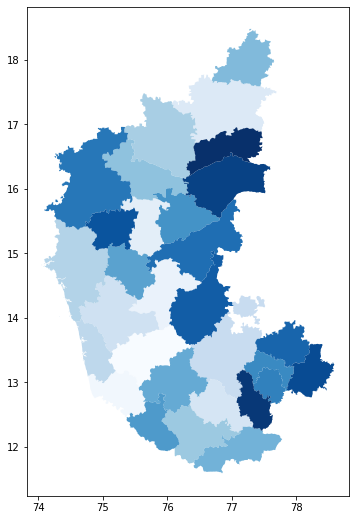

In [425]:
gdf.plot(figsize=(12,9), cmap='Blues')

In [426]:
dfKDD = pd.DataFrame(dfK['detecteddistrict'].value_counts())

In [427]:
dfKDD = dfKDD.reset_index()

In [428]:
dfKDD['district'] = dfKDD['index']
dfKDD['count'] = dfKDD['detecteddistrict']
dfKDD = dfKDD[['district','count']]

In [429]:
gdf1  = gdf.merge(dfKDD, on = 'district',how='left')

C:\Users\kisha\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


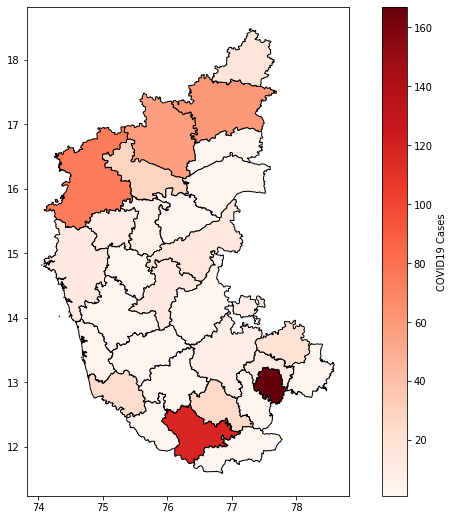

In [430]:
gdf1.plot(column = 'count',figsize=(12,9), cmap='Reds'
         , legend = True, legend_kwds={'label': "COVID19 Cases"}
         , edgecolor = 'k'
#           , missing_kwds={
#             "color": "lightgrey",
#             "edgecolor": "red",
#             "hatch": "///",
#             "label": "Missing values"
#         }
         )

In [431]:
sdf_dict = gdf1.set_index('district')['count']

In [432]:
colormap = linear.Reds_09.scale(
    gdf1['count'].min(),
    gdf1['count'].max())

In [433]:
gdf1['count'] = gdf1['count'].fillna(0)

In [434]:
gdf1

,cartodb_id,censuscode,dt_cen_cd,st_cen_cd,st_nm,district,geometry,count
0,115,570,16,29,Karnataka,Chikkamagaluru,"MULTIPOLYGON (((76.35411 13.57770, 76.35611 13...",0.0
1,130,575,21,29,Karnataka,Dakshina Kannada,"MULTIPOLYGON (((75.20194 13.18140, 75.20992 13...",24.0
2,138,567,13,29,Karnataka,Davanagere,"MULTIPOLYGON (((76.50830 14.56379, 76.50964 14...",12.0
3,187,561,7,29,Karnataka,Gadag,"MULTIPOLYGON (((75.84568 15.83773, 75.87617 15...",6.0
4,208,579,25,29,Karnataka,Kalaburagi,"MULTIPOLYGON (((76.69220 17.68175, 76.69517 17...",61.0
5,366,573,19,29,Karnataka,Mandya,"MULTIPOLYGON (((76.68466 13.04283, 76.69453 13...",26.0
6,519,568,14,29,Karnataka,Shivamogga,"MULTIPOLYGON (((75.53624 14.27739, 75.53540 14...",0.0
7,582,571,17,29,Karnataka,Tumakuru,"MULTIPOLYGON (((76.97715 14.05873, 76.95530 14...",8.0
8,587,569,15,29,Karnataka,Udupi,"MULTIPOLYGON (((75.14023 13.46326, 75.14106 13...",3.0
9,596,563,9,29,Karnataka,Uttara Kannada,"MULTIPOLYGON (((74.32141 15.51751, 74.32975 15...",12.0


In [436]:
m = folium.Map(location=[14.56379,76.50830],tiles= "cartodbpositron" #"Stamen Toner"
               , zoom_start=7)

tooltip=GeoJsonTooltip(
    fields=['district','count'],
    aliases=['District','Total Cases'],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

popup=GeoJsonPopup(
    fields=['district','count'], 
    aliases=['District','Total Cases'], 
    localize=True, 
    labels=True, 
    style="background-color: yellow;")

g = folium.GeoJson(
    gdf1[['district','count','geometry']],
    name = 'Karnataka Covid 19 cases',
    style_function=lambda x: {
        'fillColor': colormap(sdf_dict[x['properties']['district']]),
        'color': 'black',
        'weight': 0.4,
#         'dashArray': '5, 5',
        'fillOpacity': 0.8,
        'line_opacity':0.2,
        'alpha': 1,
    },
    tooltip=tooltip,
    popup=popup
).add_to(m)

folium.LayerControl().add_to(m)

m

ValueError: Thresholds are not sorted.

In [438]:
dfK['dateannounced'] = pd.to_datetime(dfK['dateannounced'],format='%Y-%d-%m')

C:\Users\kisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
dates = list(dfK['dateannounced'].sort_values(ascending=True).unique())

In [440]:
dates

[numpy.datetime64('2020-01-04T00:00:00.000000000'),
 numpy.datetime64('2020-01-05T00:00:00.000000000'),
 numpy.datetime64('2020-02-04T00:00:00.000000000'),
 numpy.datetime64('2020-02-05T00:00:00.000000000'),
 numpy.datetime64('2020-03-04T00:00:00.000000000'),
 numpy.datetime64('2020-03-13T00:00:00.000000000'),
 numpy.datetime64('2020-03-16T00:00:00.000000000'),
 numpy.datetime64('2020-03-17T00:00:00.000000000'),
 numpy.datetime64('2020-03-18T00:00:00.000000000'),
 numpy.datetime64('2020-03-19T00:00:00.000000000'),
 numpy.datetime64('2020-03-21T00:00:00.000000000'),
 numpy.datetime64('2020-03-22T00:00:00.000000000'),
 numpy.datetime64('2020-03-23T00:00:00.000000000'),
 numpy.datetime64('2020-03-24T00:00:00.000000000'),
 numpy.datetime64('2020-03-25T00:00:00.000000000'),
 numpy.datetime64('2020-03-26T00:00:00.000000000'),
 numpy.datetime64('2020-03-27T00:00:00.000000000'),
 numpy.datetime64('2020-03-28T00:00:00.000000000'),
 numpy.datetime64('2020-03-29T00:00:00.000000000'),
 numpy.datet

In [441]:
# dfK[(dfK['dateannounced']<pd.to_datetime('2020-12-04')) & (dfK['detecteddistrict']=='Bengaluru')
dfK['detecteddistrict'].unique()

array(['Bengaluru Urban', 'Kalaburagi', 'Kodagu', 'Chikkaballapura',
       'Mysuru', 'Dharwad', 'Uttara Kannada', 'Dakshina Kannada', 'Udupi',
       'Davanagere', 'Bengaluru Rural', 'Tumakuru', 'Ballari', 'Bidar',
       'Bagalkote', 'Belagavi', 'Gadag', 'Mandya', 'Vijayapura', ''],
      dtype=object)

In [442]:
dfB = pd.DataFrame(dfK[(dfK['dateannounced']<i)] #& (dfK['detecteddistrict']=='Bengaluru Urban')]
                   ['detecteddistrict'].value_counts() for i in dates)

In [443]:
xdf = pd.DataFrame()
for i in dates:
    somdf = pd.DataFrame(dfK[(dfK['dateannounced']<i)]['detecteddistrict'].value_counts())
    somdf['date'] = i
    xdf = xdf.append(somdf)

In [444]:
xdf

,detecteddistrict,date
Mysuru,5,2020-01-05
Bengaluru Urban,3,2020-01-05
Dakshina Kannada,1,2020-01-05
Bengaluru Urban,11,2020-02-04
Mandya,8,2020-02-04
...,...,...
Tumakuru,8,2020-12-04
Gadag,6,2020-12-04
,4,2020-12-04
Udupi,3,2020-12-04


In [445]:
# xdf.reset_index()
xdf = xdf.reset_index().rename(columns={"index": "district", "detecteddistrict": "count"})

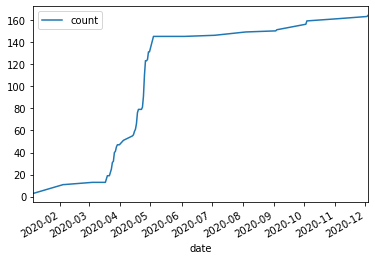

In [446]:
xdf[xdf['district']=='Bengaluru Urban'].set_index('date').plot()